## Gráficas: Países con mayor facturación

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import isfile
import sqlite3 as dbapi
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
path = '../practicas/BBDD/empresa3.db'

In [7]:
def getDatos(path, sql):
    if not isfile(path):
        raise ValueError('No se encuentra el fich:'+path)
    else:        
        # Conectar con la BD
        con = None
        try:
            con = dbapi.connect(path)
            return pd.read_sql(sql, con)
        
        except Exception as e:
            raise e
        finally:
            if con: con.close()
        

In [8]:
sql = """select pais, sum(importe)  as total from pedidos
group by pais order by 2 desc"""

Llamar a la función, obtener los 5 primeros y generar
una gráfica de tarta con los países que más facturan:
plt.pie(valores, etiquetas)


In [15]:
dt = getDatos(path, sql)
dt = dt.loc[:4]
dt

,pais,total
0,Estados Unidos,13783.33
1,Alemania,11283.28
2,Austria,7391.50
3,Brasil,4880.19
4,Francia,4205.46


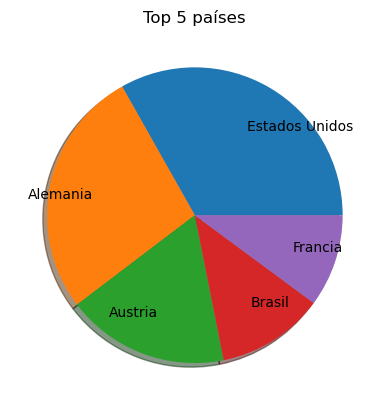

In [34]:
plt.title('Top 5 países')
plt.pie(dt.total, labels=dt.pais, \
        labeldistance=0.7,shadow=True)

# Generar PNG
plt.savefig('paises.png')

# Generar PDF
pp = PdfPages("paises.pdf")
pp.savefig()
pp.close()

<Figure size 640x480 with 0 Axes>